In [1]:
# 데이터 단순 결합
# - 데이터프레임 결합(행/열)
# - pandas의 concat()
# - merge()
import pandas as pd
data1 = {'id' : ['1','2','3','4','5'],
         'math_score' : ['100','95','80','70','75']}
df1 = pd. DataFrame(data1)
df1

,id,math_score
0,1,100
1,2,95
2,3,80
3,4,70
4,5,75


In [2]:
data2 = {'id' : ['6','7','8','9','10'],
         'math_score' : ['85','70','95','100','65']}
df2 = pd. DataFrame(data2)
df2

,id,math_score
0,6,85
1,7,70
2,8,95
3,9,100
4,10,65


In [3]:
pd.concat([df1,df2])

,id,math_score
0,1,100
1,2,95
2,3,80
3,4,70
4,5,75
0,6,85
1,7,70
2,8,95
3,9,100
4,10,65


In [4]:
pd.concat([df1,df2],axis=1)

,id,math_score,id,math_score
0,1,100,6,85
1,2,95,7,70
2,3,80,8,95
3,4,70,9,100
4,5,75,10,65


In [5]:
# 두 데이터프레임의 고유한 키를 기준으로 병합
# df.merge(df2, how = 'inner', on = None)
data2 = {'id' : ['3','4','5','6','7'],
         'eng_score' : ['100','95','80','85','70']}
df2 = pd. DataFrame(data2)
df2

,id,eng_score
0,3,100
1,4,95
2,5,80
3,6,85
4,7,70


In [6]:
# inner : 공통된 값만 반환
df1.merge(df2,how = 'inner', on = 'id')

,id,math_score,eng_score
0,3,80,100
1,4,70,95
2,5,75,80


In [7]:
df1.merge(df2,how = 'outer', on = 'id')

,id,math_score,eng_score
0,1,100,NaN
1,2,95,NaN
2,3,80,100
3,4,70,95
4,5,75,80
5,6,NaN,85
6,7,NaN,70


In [8]:
df1.merge(df2,how = 'left', on = 'id')

,id,math_score,eng_score
0,1,100,NaN
1,2,95,NaN
2,3,80,100
3,4,70,95
4,5,75,80


In [9]:
df1.merge(df2,how = 'right', on = 'id')

,id,math_score,eng_score
0,3,80,100
1,4,70,95
2,5,75,80
3,6,NaN,85
4,7,NaN,70


In [10]:
# 데이터 축소 = 차원 축소
# 주성분 분석(Principal Component Analysis: PCA):
# - 상관관계가 높은 데이터의 선형결합을 통해 고차원 데이터를 저차원의
# - 데이터로 변환하는 방법(누적 기여율 85%이상 지점까지 주성분의 수)
# - 주성분 : 서로 상관성이 높은 변수들의 선형결합, 분산을 최대
# scikit-learn decomposition 모듈의 PCA 클래스 사용
# 표준화 후 주성부 분석

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
iris_df_scaled['target'] = iris.target
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [13]:
from sklearn.decomposition import PCA
# 주성분 갯수 옵션
pca = PCA(n_components=2)

In [14]:
pca.fit(iris_df_scaled.iloc[:,:-1])
df_pca = pca.transform(iris_df_scaled.iloc[:,:-1])

In [15]:
df_pca = pd.DataFrame(df_pca,columns = ['component0','component1'])
df_pca.head()

,component0,component1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [16]:
# 주성분의 기여율 확인
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [17]:
# 주성분의 누적 기여
print(pca.explained_variance_ratio_.cumsum())

[0.72962445 0.95813207]


In [18]:
import matplotlib.pyplot as plt

# class target 정보 불러오기
df_pca['target'] = iris_df_scaled['target']

a = df_pca['target']==0
a

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: target, Length: 150, dtype: bool

In [19]:
# target 별 분리
df_pca_0 = df_pca[df_pca['target']==0]
df_pca_1 = df_pca[df_pca['target']==1]
df_pca_2 = df_pca[df_pca['target']==2]

In [20]:
df_pca_0.head()

,component0,component1,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


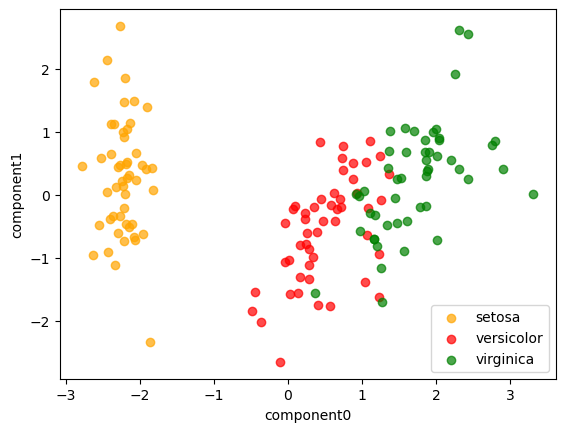

In [21]:
plt.scatter(df_pca_0['component0'], df_pca_0['component1'],color = 'orange',alpha=0.7,label='setosa')
plt.scatter(df_pca_1['component0'], df_pca_1['component1'],color = 'red',alpha=0.7,label='versicolor')
plt.scatter(df_pca_2['component0'], df_pca_2['component1'],color = 'green',alpha=0.7,label='virginica')
plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()